In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [ ]:


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, hamming_loss




##Loading the dataset

In [ ]:
# test_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv', engine='python', on_bad_lines='skip')
df = pd.read_csv('/content/drive/MyDrive/practicum/train.csv', engine='python', on_bad_lines='skip')

In [ ]:
# df = pd.merge(test_df, train_df, on='ID')

In [ ]:
df.head(10)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   
5   6  On maximizing the fundamental frequency of the...   
6   7  On the rotation period and shape of the hyperb...   
7   8  Adverse effects of polymer coating on heat tra...   
8   9  SPH calculations of Mars-scale collisions: the...   
9  10  $\mathcal{R}_{0}$ fails to predict the outbrea...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   
5    Let $\Omega \subset \mathbb{R}^n$ be a bound...                 0   
6    We observed the newly discovered hyperbolic ...                 0   
7    The ability of metallic nanoparticles to sup...                 0   
8    We model large-scale ($\approx$2000km) impac...                 0   
9    Time varying susceptibility of host at indiv...                 0   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   
5        0            1           0                     0   
6        1            0           0                     0   
7        1            0           0                     0   
8        1            0           0                     0   
9        0            0           0                     1   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0

##Exploratory Data Analysis

In [ ]:
df['Computer Science'].value_counts()

0    12378
1     8594
Name: Computer Science, dtype: int64

##Printing Info about dataframe

In [ ]:
df.info

<bound method DataFrame.info of           ID                                              TITLE  \
0          1        Reconstructing Subject-Specific Effect Maps   
1          2                 Rotation Invariance Neural Network   
2          3  Spherical polyharmonics and Poisson kernels fo...   
3          4  A finite element approximation for the stochas...   
4          5  Comparative study of Discrete Wavelet Transfor...   
...      ...                                                ...   
20967  20968  Contemporary machine learning: a guide for pra...   
20968  20969  Uniform diamond coatings on WC-Co hard alloy c...   
20969  20970  Analysing Soccer Games with Clustering and Con...   
20970  20971  On the Efficient Simulation of the Left-Tail o...   
20971  20972   Why optional stopping is a problem for Bayesians   

                                                ABSTRACT  Computer Science  \
0        Predictive models allow subject-specific inf...                 1   
1        Rotation invariance and translation invarian...                 1   
2        We introduce and develop the notion of spher...                 0   
3        The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4        Fourier-transform infra-red (FTIR) spectra o...                 1   
...                                                  ...               ...   
20967    Machine learning is finding increasingly bro...                 1   
20968    Polycrystalline diamond coatings have been g...                 0   
20969    We present a new approach for identifying si...                 1   
20970    The sum of Log-normal variates is encountere...                 0   
20971    Recently, optional stopping has been a subje...                 0   

       Physics  Mathematics  Statistics  Quantitative Biology  \
0            0            0           0                     0   
1            0            0           0                     0   
2            0            1           0                     0   
3            0            1           0                     0   
4            0            0           1                     0   
...        ...          ...         ...                   ...   
20967        1            0           0                     0   
20968        1            0           0                     0   
20969        0            0           0                     0   
20970        0            1           1                     0   
20971        0            1           1                     0   

       Quantitative Finance  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
20967                     0  
20968                     0  
20969                     0  
20970                     0  
20971                     0  

[20972 rows x 9 columns]>

##Number of sample points and columns

In [ ]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
printmd("**Sample data:**")
df.head()

Number of rows in data = 20972
Number of columns in data = 9




**Sample data:**

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

##Checking Missing Values

In [ ]:
#checking missing_values
missing_values_check = df.isnull().sum()
print(missing_values_check)

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64


In [ ]:
df.iloc[:,2:].sum(axis=1)

<ipython-input-11-6a38acb1dab8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.iloc[:,2:].sum(axis=1)


0        1
1        1
2        1
3        1
4        2
        ..
20967    2
20968    1
20969    1
20970    2
20971    2
Length: 20972, dtype: int64

##Number of articles not belonging to a certain category

In [ ]:

rowSums = df.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of articles = ",len(df))
print("Number of articles without a label = ",clean_comments_count)
print("Number of articles with labels =",(len(df)-clean_comments_count))

Total number of articles =  20972
Number of articles without a label =  0
Number of articles with labels = 20972


<ipython-input-12-5d17f7e56c16>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowSums = df.iloc[:,2:].sum(axis=1)


In [ ]:

article_categories = list(df.columns.values)
categories = article_categories[3:]
print(categories)

['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']


##Calculating number of topics of articles in each category

In [ ]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['article type', '--number of articles'])
df_stats

article type  --number of articles
0      Computer Science                  8594
1               Physics                  6013
2           Mathematics                  5618
3            Statistics                  5206
4  Quantitative Biology                   587
5  Quantitative Finance                   249

In [ ]:
categories = list(df.iloc[:,3:].columns.values)
categories

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

##Comments in each category

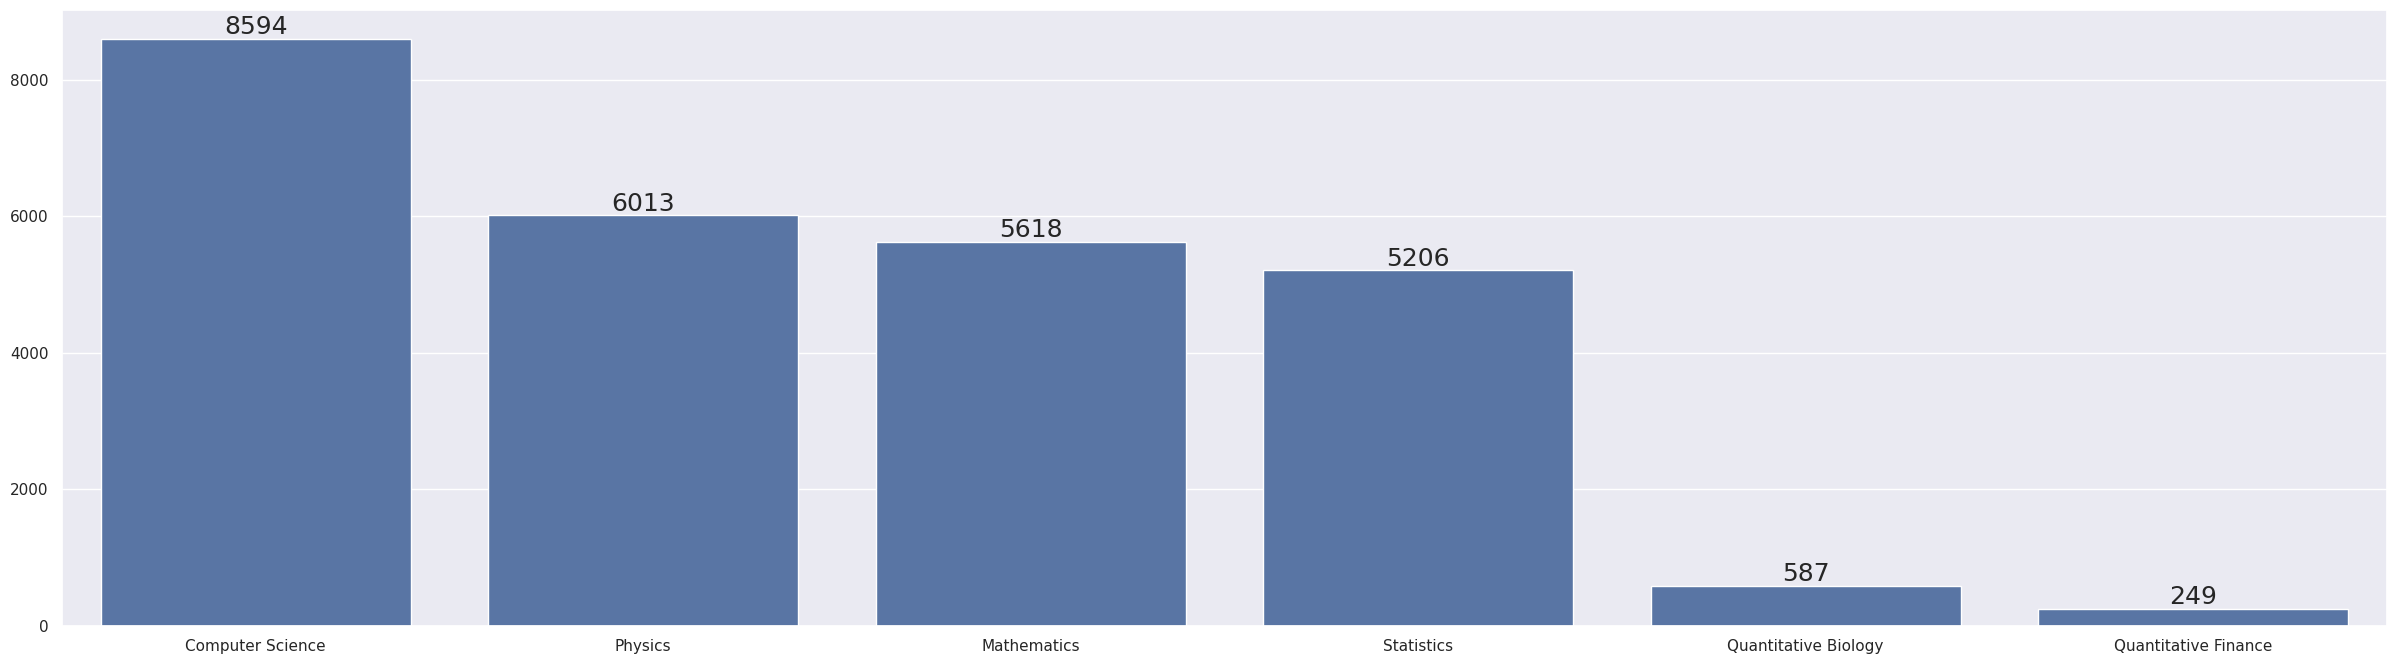

In [ ]:
categories = list(df.iloc[:,3:].columns.values)
sns.set(font_scale = 1)
plt.figure(figsize=(30,8))

ax = sns.barplot(x=categories, y=df.iloc[:, 3:].sum().values)

rects = ax.patches

labels = df.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=18)
plt.show()


In [ ]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts
rowSums

0        1
1        1
2        1
3        1
4        2
        ..
20967    2
20968    1
20969    1
20970    2
20971    2
Length: 20972, dtype: int64

In [ ]:
multiLabel_counts

1    15928
2     4793
3      251
dtype: int64

In [ ]:
# df.iloc[:,3:]

In [ ]:
labels = multiLabel_counts.values
labels

array([15928,  4793,   251])

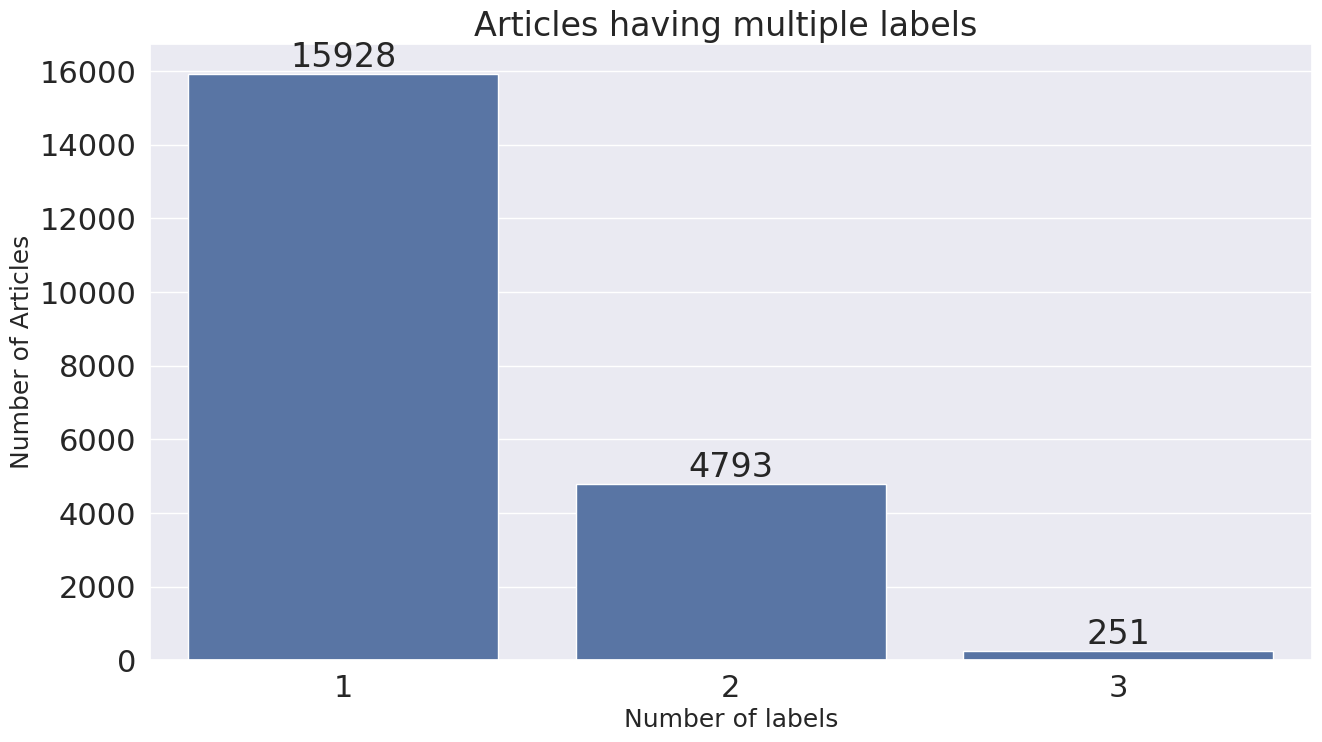

In [ ]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

# multiLabel_counts = multiLabel_counts.iloc[0:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
plt.title("Articles having multiple labels ")
plt.ylabel('Number of Articles', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)#adding the text labels

rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

In [ ]:
df.columns.values

array(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics',
       'Mathematics', 'Statistics', 'Quantitative Biology',
       'Quantitative Finance'], dtype=object)

In [ ]:
from wordcloud import WordCloud,STOPWORDS

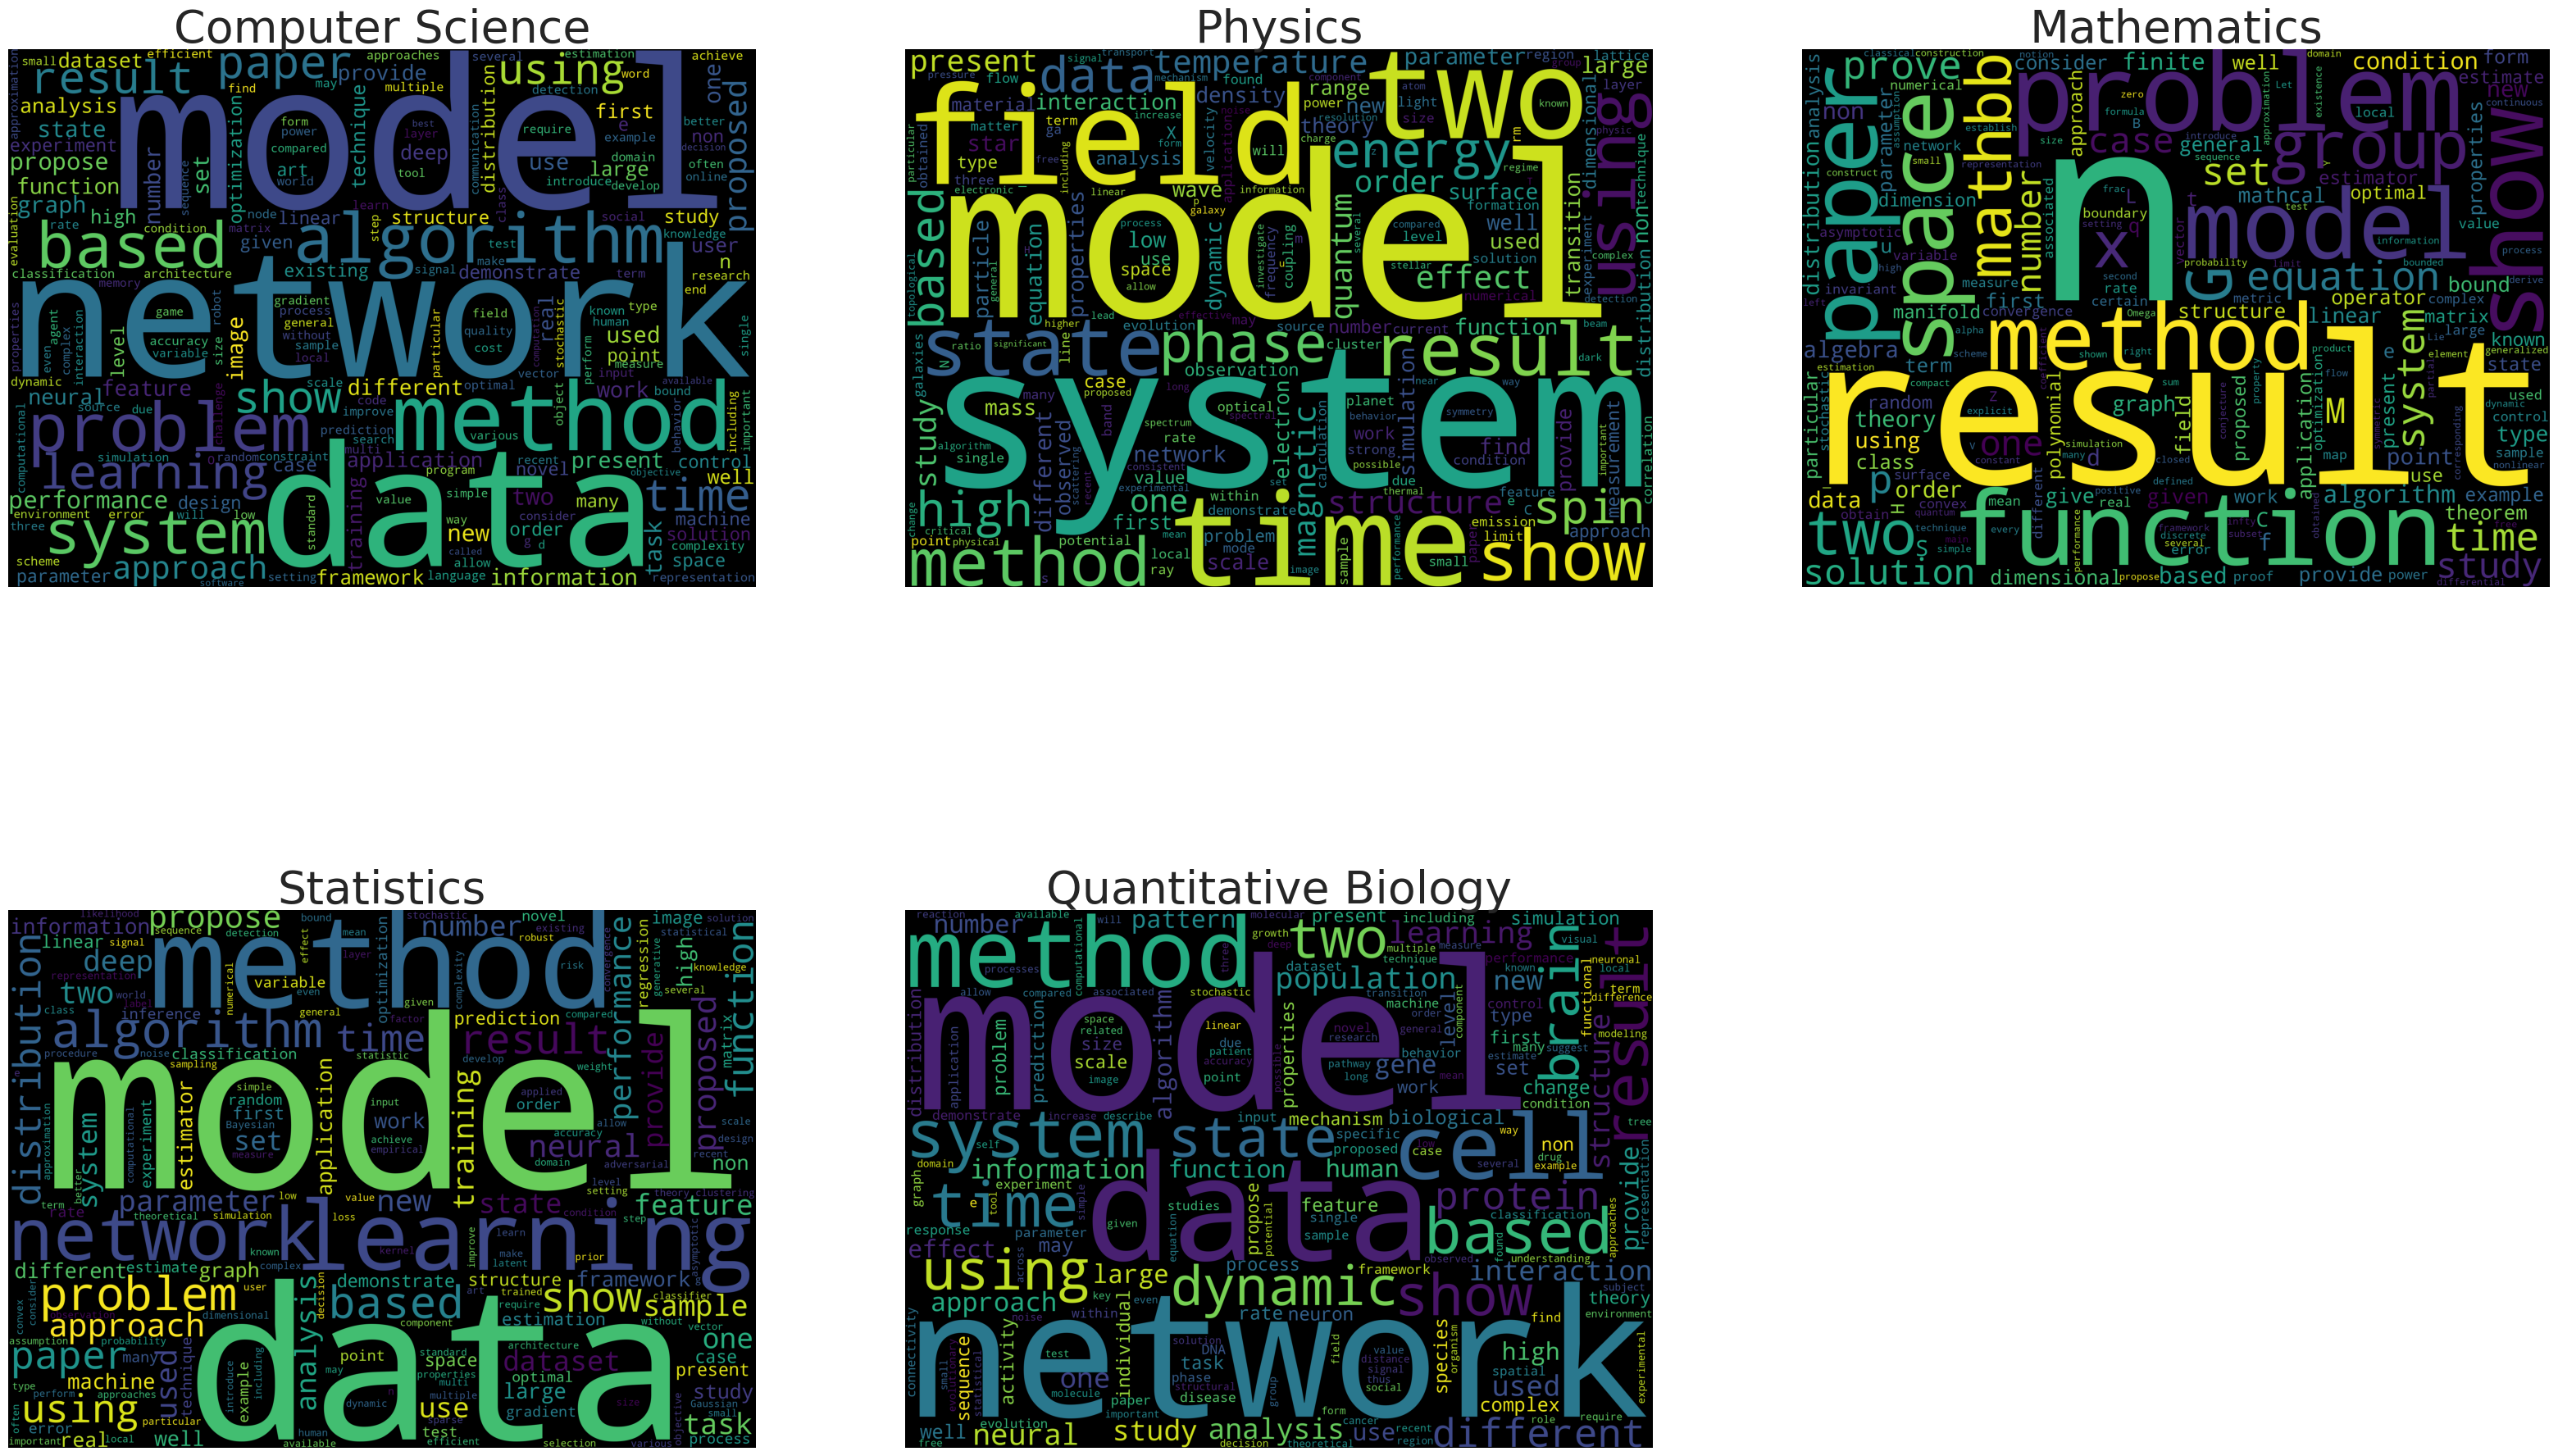

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Computer Science
subset = df[df['Computer Science']==1]
text = subset.ABSTRACT.values
cloud_CS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Computer Science",fontsize=40)
plt.imshow(cloud_CS)


subset = df[df['Physics']==1]
text = subset.ABSTRACT.values
cloud_Physics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Physics",fontsize=40)
plt.imshow(cloud_Physics)


# Mathematics', 'Statistics', 'Quantitative Biology'

subset = df[df['Mathematics']==1]
text = subset.ABSTRACT.values
cloud_Mathematics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Mathematics",fontsize=40)
plt.imshow(cloud_Mathematics)


subset = df[df['Statistics']==1]
text = subset.ABSTRACT.values
cloud_Statistics = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Statistics",fontsize=40)
plt.imshow(cloud_Statistics)

subset = df[df['Quantitative Biology']==1]
text = subset.ABSTRACT.values
cloud_Quantitative_Biology = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Quantitative Biology",fontsize=40)
plt.imshow(cloud_Quantitative_Biology)



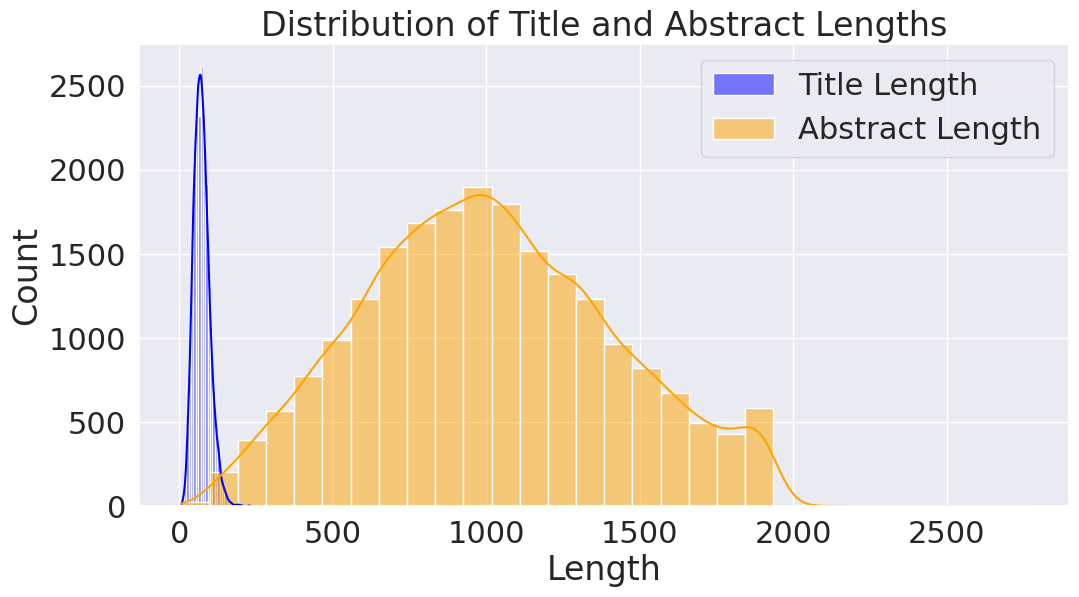

In [ ]:
# Distribution of classes in target variables
# class_columns = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
# class_distribution = df[class_columns].sum()

# plt.figure(figsize=(10, 6))
# sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
# plt.title("Distribution of Classes")
# plt.xlabel("Classes")
# plt.ylabel("Count")
# plt.show()

# Distribution of word lengths in 'TITLE' and 'ABSTRACT'
df['Title_Length'] = df['TITLE'].apply(len)
df['Abstract_Length'] = df['ABSTRACT'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['Title_Length'], bins=30, kde=True, color='blue', label='Title Length')
sns.histplot(df['Abstract_Length'], bins=30, kde=True, color='orange', label='Abstract Length')
plt.title("Distribution of Title and Abstract Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.legend()
plt.show()

# # Correlation heatmap
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()


##Data Pre-Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Cleaning and standardizing data

In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


In [ ]:
df.head(10)

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   
5   6  On maximizing the fundamental frequency of the...   
6   7  On the rotation period and shape of the hyperb...   
7   8  Adverse effects of polymer coating on heat tra...   
8   9  SPH calculations of Mars-scale collisions: the...   
9  10  $\mathcal{R}_{0}$ fails to predict the outbrea...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   
5    Let $\Omega \subset \mathbb{R}^n$ be a bound...                 0   
6    We observed the newly discovered hyperbolic ...                 0   
7    The ability of metallic nanoparticles to sup...                 0   
8    We model large-scale ($\approx$2000km) impac...                 0   
9    Time varying susceptibility of host at indiv...                 0   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   
5        0            1           0                     0   
6        1            0           0                     0   
7        1            0           0                     0   
8        1            0           0                     0   
9        0            0           0                     1   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0

In [ ]:
df['TITLE'] = df['TITLE'].str.lower()
df['TITLE'] = df['TITLE'].apply(cleanHtml)
df['TITLE'] = df['TITLE'].apply(cleanPunc)
df['TITLE'] = df['TITLE'].apply(keepAlpha)
df.head()

ID                                              TITLE  \
0   1        reconstructing subject specific effect maps   
1   2                 rotation invariance neural network   
2   3  spherical polyharmonics and poisson kernels fo...   
3   4  a finite element approximation for the stochas...   
4   5  comparative study of discrete wavelet transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [ ]:
df['ABSTRACT'] = df['ABSTRACT'].str.lower()
df['ABSTRACT'] = df['ABSTRACT'].apply(cleanHtml)
df['ABSTRACT'] = df['ABSTRACT'].apply(cleanPunc)
df['ABSTRACT'] = df['ABSTRACT'].apply(keepAlpha)
df.head()

ID                                              TITLE  \
0   1        reconstructing subject specific effect maps   
1   2                 rotation invariance neural network   
2   3  spherical polyharmonics and poisson kernels fo...   
3   4  a finite element approximation for the stochas...   
4   5  comparative study of discrete wavelet transfor...   

                                            ABSTRACT  Computer Science  \
0  predictive models allow subject specific infer...                 1   
1  rotation invariance and translation invariance...                 1   
2  we introduce and develop the notion of spheric...                 0   
3  the stochastic landau lifshitz gilbert llg equ...                 0   
4  fourier transform infra red ftir spectra of sa...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

##Removing Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df['TITLE'] = df['TITLE'].apply(removeStopWords)
df['ABSTRACT'] = df['ABSTRACT'].apply(removeStopWords)

df.head()


ID                                              TITLE  \
0   1        reconstructing subject specific effect maps   
1   2                 rotation invariance neural network   
2   3  spherical polyharmonics  poisson kernels  poly...   
3   4   finite element approximation   stochastic max...   
4   5  comparative study  discrete wavelet transforms...   

                                            ABSTRACT  Computer Science  \
0  predictive models allow subject specific infer...                 1   
1  rotation invariance  translation invariance  g...                 1   
2   introduce  develop  notion  spherical polyhar...                 0   
3   stochastic landau lifshitz gilbert llg equati...                 0   
4  fourier transform infra red ftir spectra  samp...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

##Stemming

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['TITLE'] = df['TITLE'].apply(stemming)
df['ABSTRACT'] = df['ABSTRACT'].apply(stemming)
df.head()

ID                                              TITLE  \
0   1              reconstruct subject specif effect map   
1   2                        rotat invari neural network   
2   3  spheric polyharmon poisson kernel polyharmon f...   
3   4  finit element approxim stochast maxwel landau ...   
4   5  compar studi discret wavelet transform wavelet...   

                                            ABSTRACT  Computer Science  \
0  predict model allow subject specif infer analy...                 1   
1  rotat invari translat invari great valu imag r...                 1   
2  introduc develop notion spheric polyharmon nat...                 0   
3  stochast landau lifshitz gilbert llg equat cou...                 0   
4  fourier transform infra red ftir spectra sampl...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [ ]:
df.head(1)

In [ ]:
# new_df = df

In [ ]:
####

#Joining Title + Abstract Columns


In [ ]:
df['TEXT'] = df['TITLE'] + ' ' + df['ABSTRACT']
df

ID                                              TITLE  \
0          1              reconstruct subject specif effect map   
1          2                        rotat invari neural network   
2          3  spheric polyharmon poisson kernel polyharmon f...   
3          4  finit element approxim stochast maxwel landau ...   
4          5  compar studi discret wavelet transform wavelet...   
...      ...                                                ...   
20967  20968  contemporari machin learn guid practition phys...   
20968  20969  uniform diamond coat wc co hard alloy cut inse...   
20969  20970               analys soccer game cluster conceptor   
20970  20971  effici simul left tail sum correl log normal v...   
20971  20972                       option stop problem bayesian   

                                                ABSTRACT  Computer Science  \
0      predict model allow subject specif infer analy...                 1   
1      rotat invari translat invari great valu imag r...                 1   
2      introduc develop notion spheric polyharmon nat...                 0   
3      stochast landau lifshitz gilbert llg equat cou...                 0   
4      fourier transform infra red ftir spectra sampl...                 1   
...                                                  ...               ...   
20967  machin learn find increas broad applic physic ...                 1   
20968  polycrystallin diamond coat grown cement carbi...                 0   
20969  present new approach identifi situat behaviour...                 1   
20970  sum log normal variat encount mani challeng ap...                 0   
20971  recent option stop subject debat bayesian psyc...                 0   

       Physics  Mathematics  Statistics  Quantitative Biology  \
0            0            0           0                     0   
1            0            0           0                     0   
2            0            1           0                     0   
3            0            1           0                     0   
4            0            0           1                     0   
...        ...          ...         ...                   ...   
20967        1            0           0                     0   
20968        1            0           0                     0   
20969        0            0           0                     0   
20970        0            1           1                     0   
20971        0            1           1                     0   

       Quantitative Finance                                               TEXT  
0                         0  reconstruct subject specif effect map predict ...  
1                         0  rotat invari neural network rotat invari trans...  
2                         0  spheric polyharmon poisson kernel polyharmon f...  
3                         0  finit element approxim stochast maxwel landau ...  
4                         0  compar studi discret wavelet transform wavelet...  
...                     ...                                                ...  
20967                     0  contemporari machin learn guid practition phys...  
20968                     0  uniform diamond coat wc co hard alloy cut inse...  
20969                     0  analys soccer game cluster conceptor present n...  
20970                     0  effici simul left tail sum correl log normal v...  
20971                     0  option stop problem bayesian recent option sto...  

[20972 rows x 10 columns]

#Feature Engineering

###Adding new features

In [ ]:
df['Text_Length'] = df['TEXT'].apply(len)
df['Text_Word_Count'] = df['TEXT'].apply(lambda x: len(x.split()))
df['Average_Word_Length_TEXT'] = df['TITLE'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['Contains_Numerals_Title'] = df['TITLE'].apply(lambda x: any(char.isdigit() for char in x))

In [ ]:
df.head(2)

ID                                  TITLE  \
0   1  reconstruct subject specif effect map   
1   2            rotat invari neural network   

                                            ABSTRACT  Computer Science  \
0  predict model allow subject specif infer when ...                 1   
1  rotat invari and translat invari have great va...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   

   Quantitative Finance                                               TEXT  \
0                     0  reconstruct subject specif effect map predict ...   
1                     0  rotat invari neural network rotat invari and t...   

   Text_Length  Text_Word_Count  Average_Word_Length_TEXT  \
0         1622              283                       6.6   
1          456               82                       6.0   

   Contains_Numerals_Title  
0                    False  
1                    False

In [ ]:
# df

In [ ]:
new_df = df[['TEXT','Text_Length','Text_Word_Count','Average_Word_Length_TEXT','Contains_Numerals_Title','Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']].copy()

In [ ]:
new_df

TEXT  Text_Length  \
0      reconstruct subject specif effect map predict ...         1296   
1      rotat invari neural network rotat invari trans...          342   
2      spheric polyharmon poisson kernel polyharmon f...          484   
3      finit element approxim stochast maxwel landau ...          554   
4      compar studi discret wavelet transform wavelet...          688   
...                                                  ...          ...   
20967  contemporari machin learn guid practition phys...          891   
20968  uniform diamond coat wc co hard alloy cut inse...          650   
20969  analys soccer game cluster conceptor present n...          822   
20970  effici simul left tail sum correl log normal v...          836   
20971  option stop problem bayesian recent option sto...          547   

       Text_Word_Count  Average_Word_Length_TEXT  Contains_Numerals_Title  \
0                  194                  6.600000                    False   
1                   51                  6.000000                    False   
2                   64                  8.000000                    False   
3                   79                  6.777778                    False   
4                  100                  6.333333                    False   
...                ...                       ...                      ...   
20967              127                  7.000000                    False   
20968               99                  4.923077                    False   
20969              118                  6.400000                    False   
20970              127                  4.777778                    False   
20971               81                  6.250000                    False   

       Computer Science  Physics  Mathematics  Statistics  \
0                     1        0            0           0   
1                     1        0            0           0   
2                     0        0            1           0   
3                     0        0            1           0   
4                     1        0            0           1   
...                 ...      ...          ...         ...   
20967                 1        1            0           0   
20968                 0        1            0           0   
20969                 1        0            0           0   
20970                 0        0            1           1   
20971                 0        0            1           1   

       Quantitative Biology  Quantitative Finance  
0                         0                     0  
1                         0                     0  
2                         0                     0  
3                         0                     0  
4                         0                     0  
...                     ...                   ...  
20967                     0                     0  
20968                     0                     0  
20969                     0                     0  
20970                     0                     0  
20971                     0                     0  

[20972 rows x 11 columns]

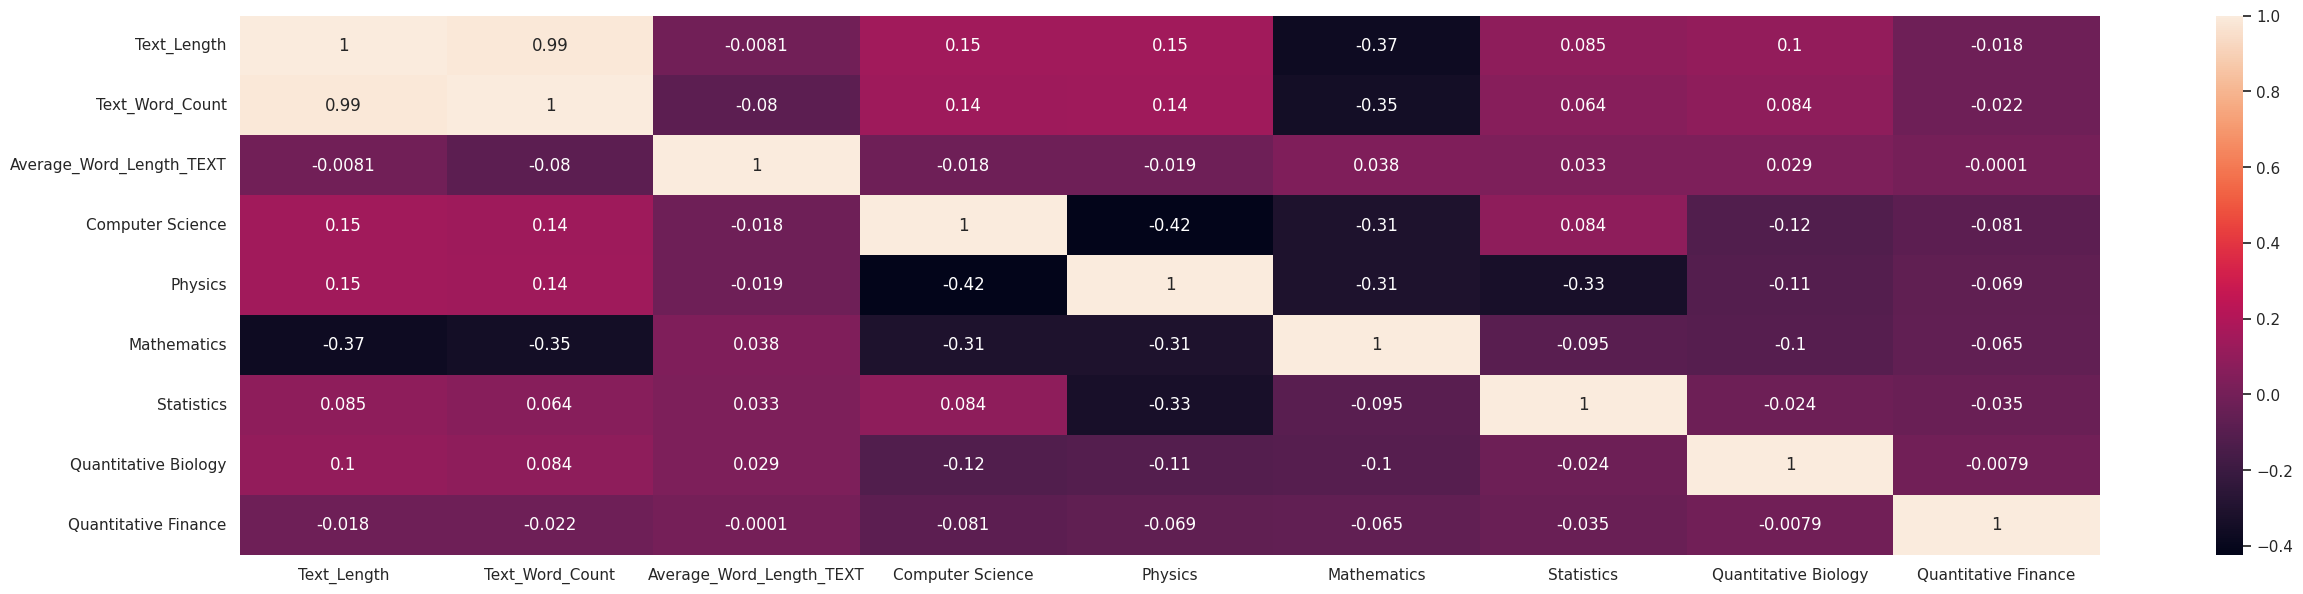

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming 'new_df' is your DataFrame

# Select columns with data types of int64 and float64
numeric_df = new_df.select_dtypes(include=[np.int64, np.float64])

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr("pearson")

# Create the heatmap
plt.figure(figsize=(30, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()  # This line is required to display the plot in some environments


<Axes: >

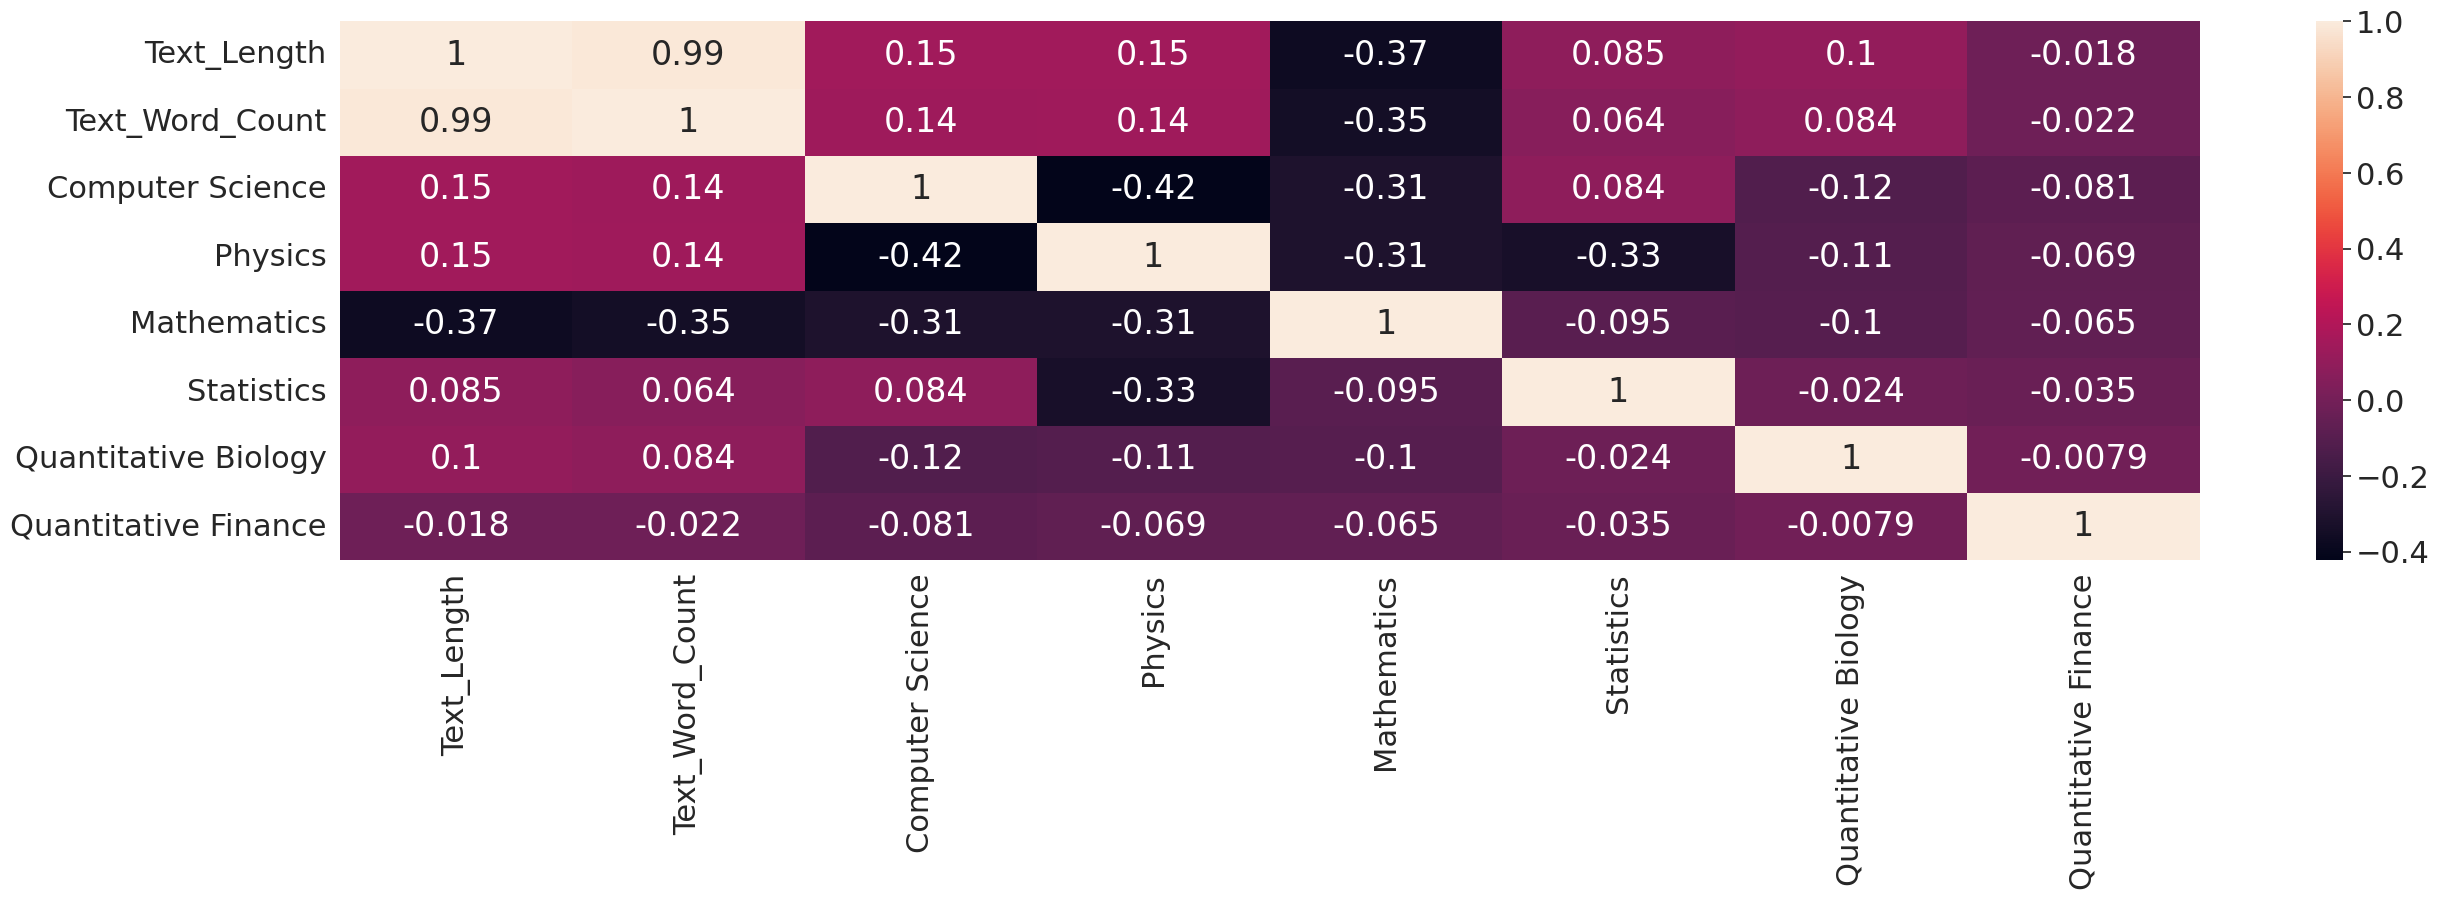

In [ ]:
plt.figure(figsize=(30, 7))
sns.heatmap(new_df[new_df.loc[:, new_df.dtypes == np.int64].columns.to_list()].corr("pearson"), annot=True)

<Axes: >

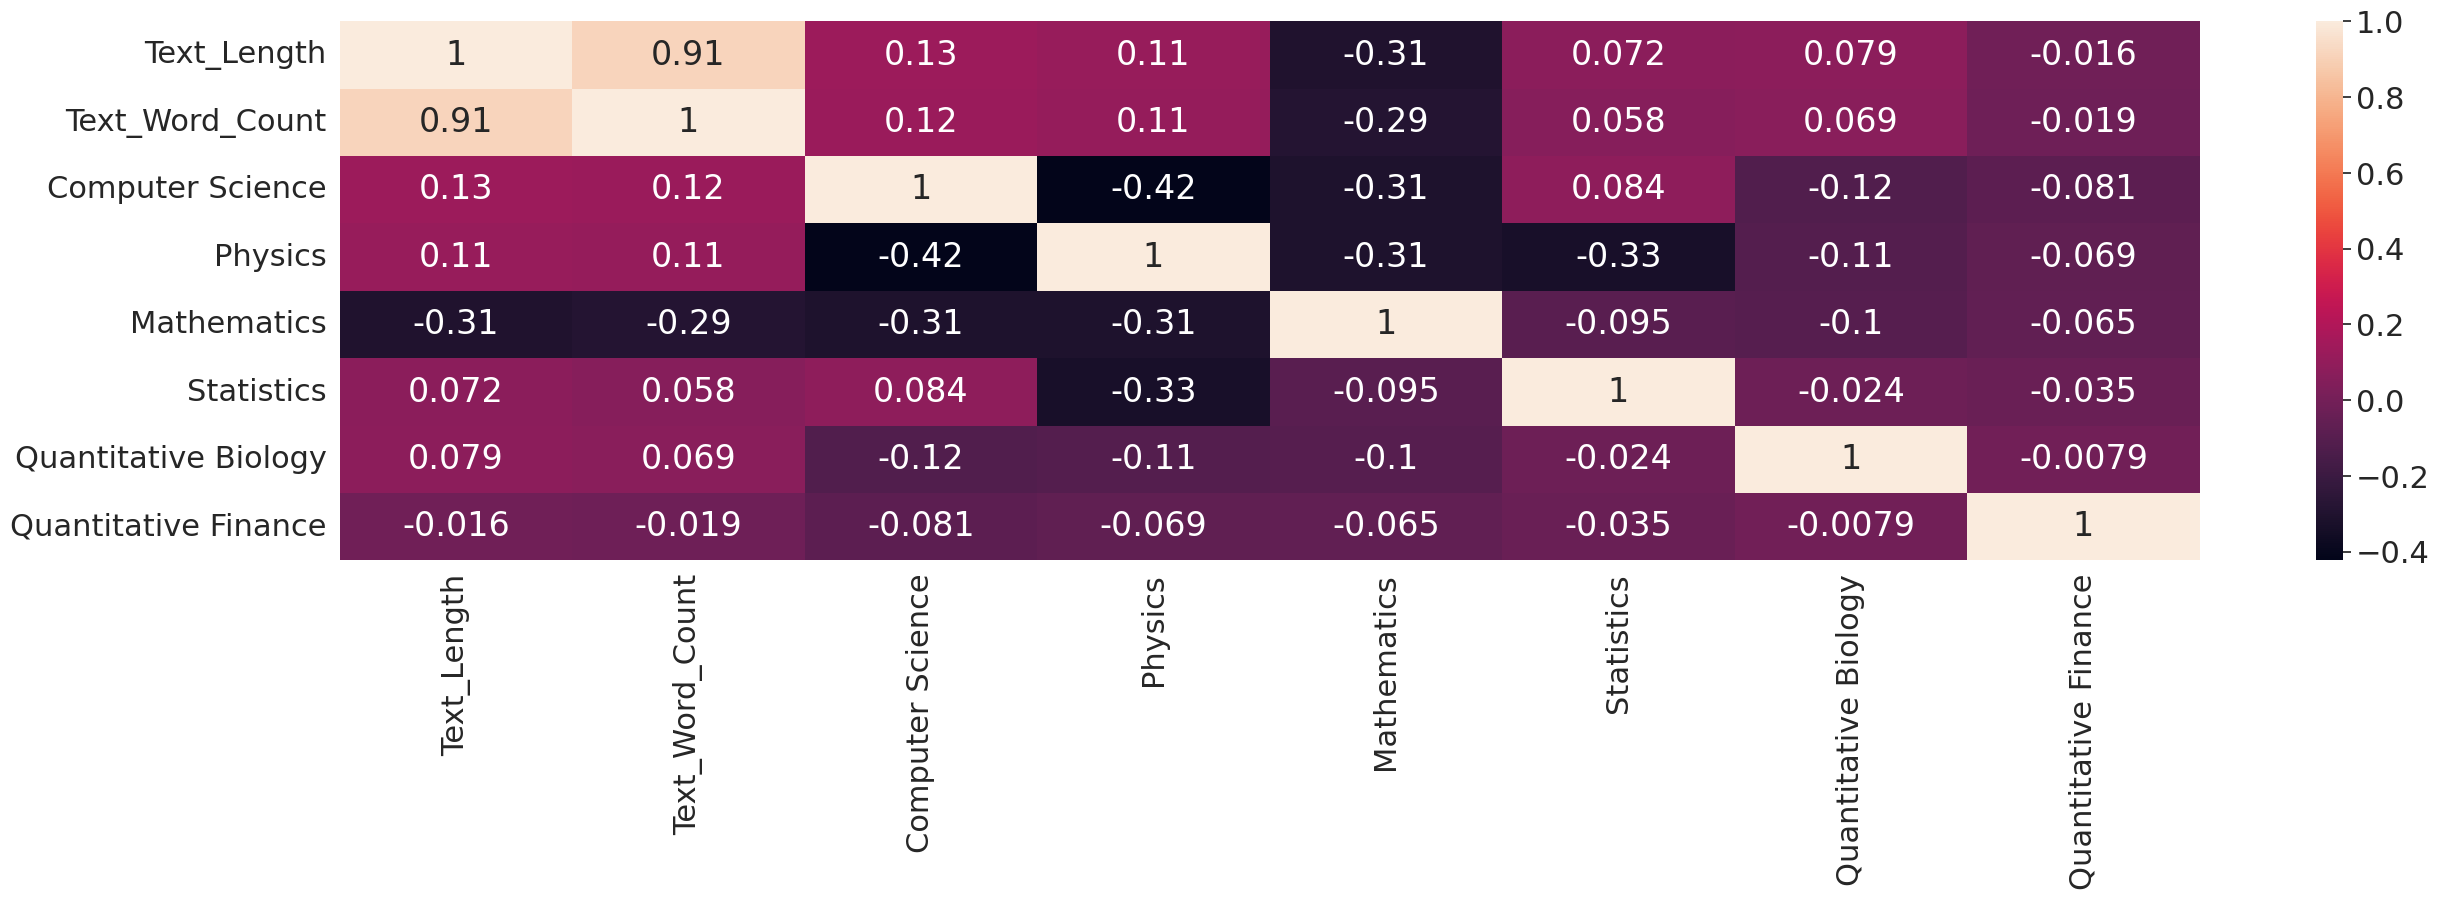

In [ ]:
plt.figure(figsize=(30, 7))
sns.heatmap(new_df[new_df.loc[:, new_df.dtypes == np.int64].columns.to_list()].corr("kendall"), annot=True)

<Axes: >

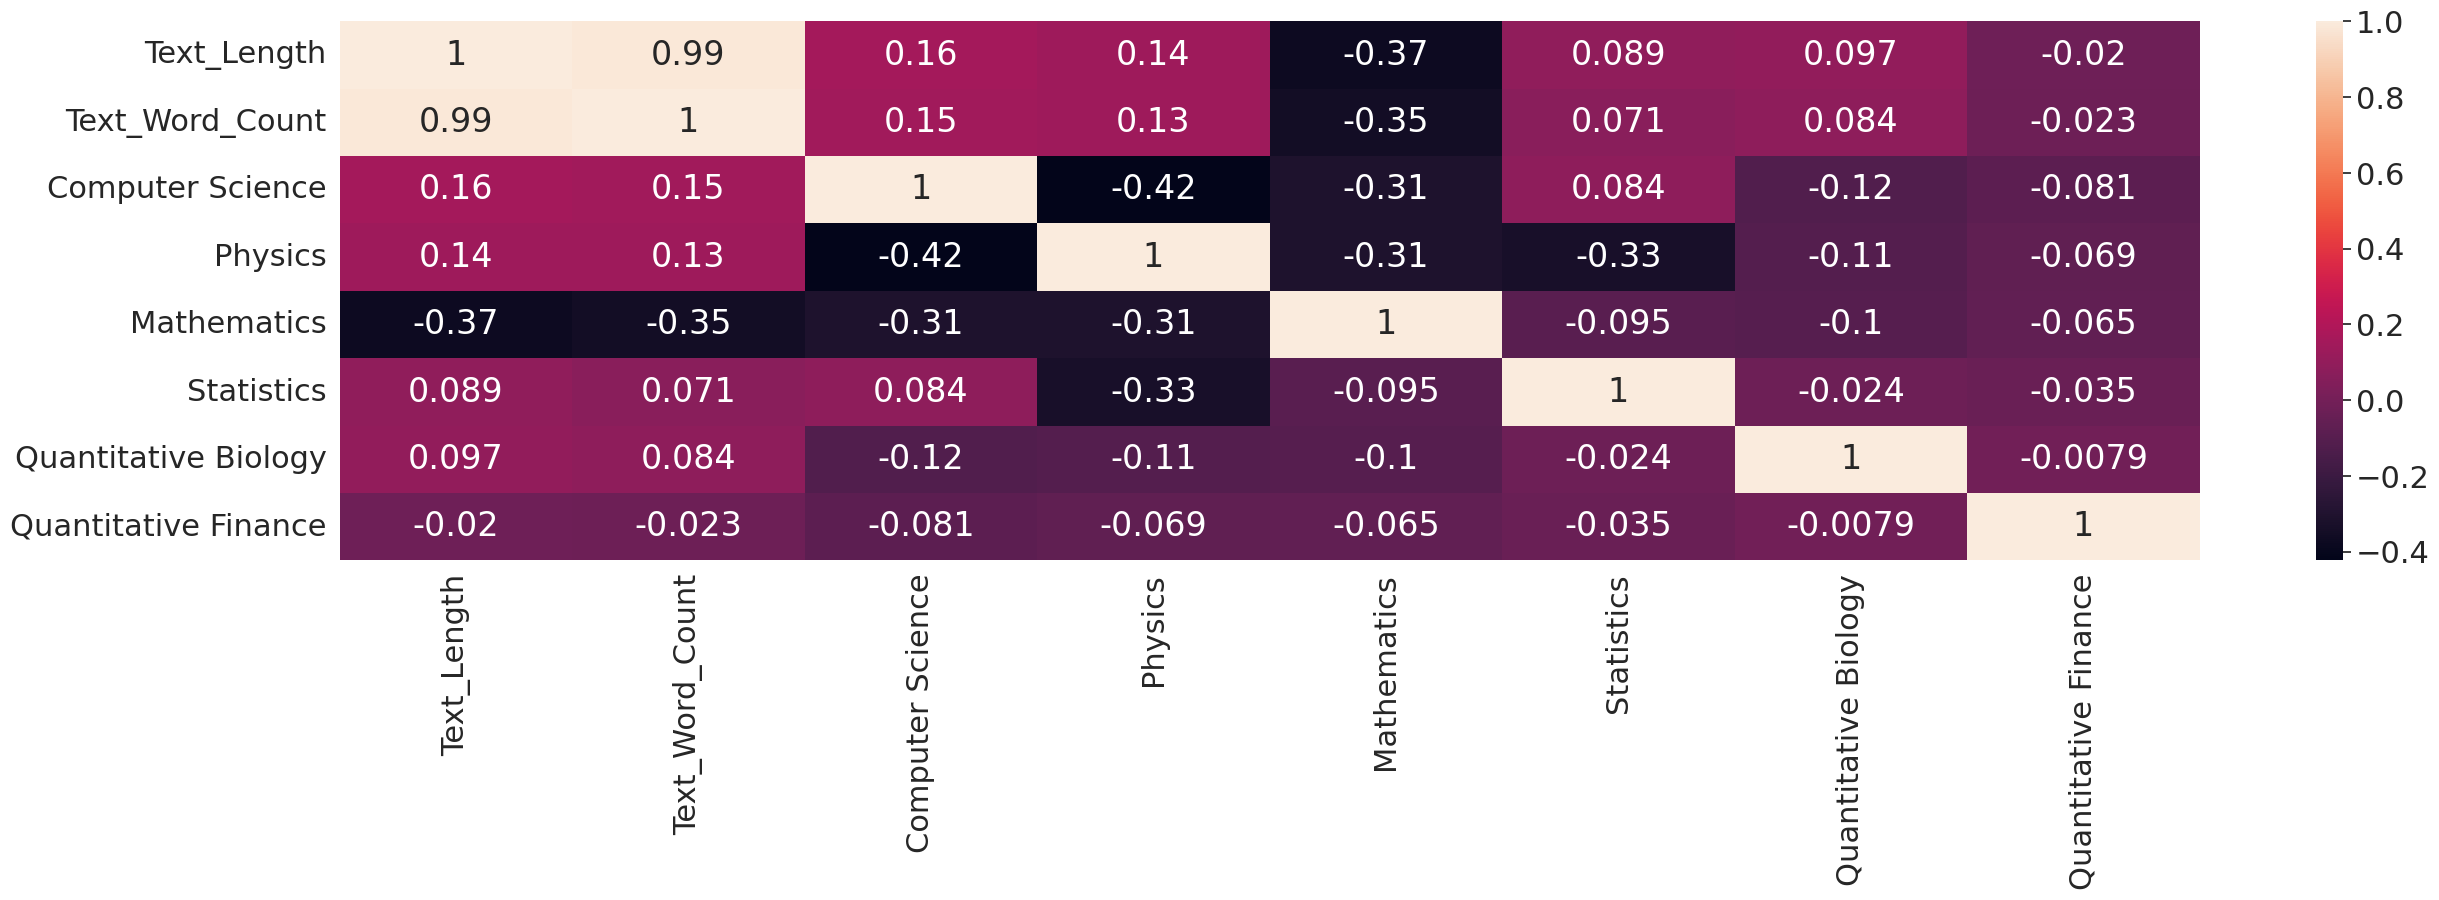

In [ ]:
plt.figure(figsize=(30, 7))
sns.heatmap(new_df[new_df.loc[:, new_df.dtypes == np.int64].columns.to_list()].corr("spearman"), annot=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/practicum/data.csv', index=False)

In [ ]:
# numeric_df = new_df.select_dtypes(include=[np.int64, np.float64])

In [ ]:

kendallcorr = df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("kendall")
pearsoncorr = df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("pearson")
spearmancorr = df[df.loc[:, df.dtypes == np.int64].columns.to_list()].corr("spearman")

In [ ]:
kendallcorrSet_CS = set(kendallcorr[kendallcorr['Computer Science'] >= 0.0010].index.to_list())
kendallcorrSet_physics = set(kendallcorr[kendallcorr >= 0.0010].index.to_list())
kendallcorrSet_maths = set(kendallcorr[kendallcorr >= 0.0010].index.to_list())
kendallcorrSet_statistics =set(kendallcorr[kendallcorr['Statistics'] >= 0.0010].index.to_list())
kendallcorrSet_QB = set(kendallcorr[kendallcorr['Quantitative Biology'] >= 0.0010].index.to_list())
kendallcorrSet_QF = set(kendallcorr[kendallcorr['Quantitative Finance']>= 0.0010].index.to_list())

In [ ]:
pearsoncorrSet_CS =         set(pearsoncorr[pearsoncorr['Computer Science'] >= 0.0010].index.to_list())
pearsoncorrSet_physics =    set(pearsoncorr[pearsoncorr >= 0.0010].index.to_list())
pearsoncorrSet_maths =      set(pearsoncorr[pearsoncorr >= 0.0010].index.to_list())
pearsoncorrSet_statistics=  set(pearsoncorr[pearsoncorr['Statistics'] >= 0.0010].index.to_list())
pearsoncorrSet_QB =         set(pearsoncorr[pearsoncorr['Quantitative Biology'] >= 0.0010].index.to_list())
pearsoncorrSet_QF =         set(pearsoncorr[pearsoncorr['Quantitative Finance']>= 0.0010].index.to_list())

In [ ]:
spearmancorrSet_CS =         set(spearmancorr[spearmancorr['Computer Science'] >= 0.0010].index.to_list())
spearmancorrSet_physics =    set(spearmancorr[spearmancorr >= 0.0010].index.to_list())
spearmancorrSet_maths =      set(spearmancorr[spearmancorr >= 0.0010].index.to_list())
spearmancorrSet_statistics=  set(spearmancorr[spearmancorr['Statistics'] >= 0.0010].index.to_list())
spearmancorrSet_QB =         set(spearmancorr[spearmancorr['Quantitative Biology'] >= 0.0010].index.to_list())
spearmancorrSet_QF =         set(spearmancorr[spearmancorr['Quantitative Finance']>= 0.0010].index.to_list())

In [ ]:
interSets = set.intersection( spearmancorrSet_CS,
                               spearmancorrSet_physics,
                               spearmancorrSet_maths,
                               spearmancorrSet_statistics,
                               spearmancorrSet_QB,
                              spearmancorrSet_QF,

                              pearsoncorrSet_CS,
                              pearsoncorrSet_physics,
                              pearsoncorrSet_maths,
                              pearsoncorrSet_statistics,
                              pearsoncorrSet_QB,
                              pearsoncorrSet_QF,

                              kendallcorrSet_CS,
                              kendallcorrSet_physics,
                              kendallcorrSet_maths,
                              kendallcorrSet_statistics,
                              kendallcorrSet_QB,
                              kendallcorrSet_QF
                              )

In [ ]:
interSets
# kendallcorrSet
# df.columns

set()

In [ ]:
new_df.columns

Index(['TEXT', 'Text_Length', 'Text_Word_Count', 'Average_Word_Length_TEXT',
       'Contains_Numerals_Title', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [ ]:
new_df.sample(1)

TEXT  Computer Science  \
19863  robust function network critic structur defect...                 0   

       Physics  Mathematics  Statistics  Quantitative Biology  \
19863        0            0           0                     1   

       Quantitative Finance  
19863                     0

In [37]:

del new_df['Text_Length']
del new_df['Text_Word_Count']
del new_df['Average_Word_Length_TEXT']
del new_df['Contains_Numerals_Title']

In [ ]:
new_df

TEXT  Computer Science  \
0      reconstruct subject specif effect map predict ...                 1   
1      rotat invari neural network rotat invari trans...                 1   
2      spheric polyharmon poisson kernel polyharmon f...                 0   
3      finit element approxim stochast maxwel landau ...                 0   
4      compar studi discret wavelet transform wavelet...                 1   
...                                                  ...               ...   
20967  contemporari machin learn guid practition phys...                 1   
20968  uniform diamond coat wc co hard alloy cut inse...                 0   
20969  analys soccer game cluster conceptor present n...                 1   
20970  effici simul left tail sum correl log normal v...                 0   
20971  option stop problem bayesian recent option sto...                 0   

       Physics  Mathematics  Statistics  Quantitative Biology  \
0            0            0           0                     0   
1            0            0           0                     0   
2            0            1           0                     0   
3            0            1           0                     0   
4            0            0           1                     0   
...        ...          ...         ...                   ...   
20967        1            0           0                     0   
20968        1            0           0                     0   
20969        0            0           0                     0   
20970        0            1           1                     0   
20971        0            1           1                     0   

       Quantitative Finance  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
20967                     0  
20968                     0  
20969                     0  
20970                     0  
20971                     0  

[20972 rows x 7 columns]

In [ ]:
new_df.iloc[:, 1:7]

Computer Science  Physics  Mathematics  Statistics  \
0                     1        0            0           0   
1                     1        0            0           0   
2                     0        0            1           0   
3                     0        0            1           0   
4                     1        0            0           1   
...                 ...      ...          ...         ...   
20967                 1        1            0           0   
20968                 0        1            0           0   
20969                 1        0            0           0   
20970                 0        0            1           1   
20971                 0        0            1           1   

       Quantitative Biology  Quantitative Finance  
0                         0                     0  
1                         0                     0  
2                         0                     0  
3                         0                     0  
4                         0                     0  
...                     ...                   ...  
20967                     0                     0  
20968                     0                     0  
20969                     0                     0  
20970                     0                     0  
20971                     0                     0  

[20972 rows x 6 columns]

In [38]:
new_df

TEXT  Computer Science  \
0      reconstruct subject specif effect map predict ...                 1   
1      rotat invari neural network rotat invari trans...                 1   
2      spheric polyharmon poisson kernel polyharmon f...                 0   
3      finit element approxim stochast maxwel landau ...                 0   
4      compar studi discret wavelet transform wavelet...                 1   
...                                                  ...               ...   
20967  contemporari machin learn guid practition phys...                 1   
20968  uniform diamond coat wc co hard alloy cut inse...                 0   
20969  analys soccer game cluster conceptor present n...                 1   
20970  effici simul left tail sum correl log normal v...                 0   
20971  option stop problem bayesian recent option sto...                 0   

       Physics  Mathematics  Statistics  Quantitative Biology  \
0            0            0           0                     0   
1            0            0           0                     0   
2            0            1           0                     0   
3            0            1           0                     0   
4            0            0           1                     0   
...        ...          ...         ...                   ...   
20967        1            0           0                     0   
20968        1            0           0                     0   
20969        0            0           0                     0   
20970        0            1           1                     0   
20971        0            1           1                     0   

       Quantitative Finance  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
20967                     0  
20968                     0  
20969                     0  
20970                     0  
20971                     0  

[20972 rows x 7 columns]

##Training Logistic Regression Model using OneVSRest Classifier

In [41]:

# Combine TITLE and ABSTRACT into a single feature

X = new_df['TEXT']
y = new_df.drop(columns=['TEXT'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer and Logistic Regression model within a OneVsRest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear'))),
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and hamming loss as evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='micro')
accuracy, hamming, f1


(0.6407628128724672, 0.07989670242352007, 0.7978284910023123)

In [ ]:
X_train.shape, y_train.shape

In [40]:
from sklearn.metrics import f1_score
# f1_score(y_test, y_pred,average='micro')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Split the data into features and labels
X = new_df['TEXT']
y = new_df.drop(columns=['TEXT'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer and KNN model within a OneVsRest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(KNeighborsClassifier())),
])

# Train the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', OneVsRestClassifier(estimator=KNeighborsClassifier()))])

In [ ]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and hamming loss as evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)

print('Accuracy:', accuracy)
print('Hamming Loss:', hamming)

f1_score(y_test, y_pred,average='micro')

Accuracy: 0.5883194278903456
Hamming Loss: 0.10158919348430671


0.7499755549036864

In [ ]:
dt_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(DecisionTreeClassifier(random_state=42))),
])

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Predict on the test set with Decision Tree
y_pred_dt = dt_pipeline.predict(X_test)

# Calculate accuracy and hamming loss as evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
hamming_dt = hamming_loss(y_test, y_pred_dt)

print('Decision Tree Accuracy:', accuracy_dt)
print('Decision Tree Hamming Loss:', hamming_dt)

Decision Tree Accuracy: 0.4441001191895113
Decision Tree Hamming Loss: 0.13353198251887166


In [ ]:
f1_score(y_test, y_pred_dt,average='micro')

0.6812707444286393

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(RandomForestClassifier(random_state=42, n_jobs=-1))),
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict on the test set with Random Forest
y_pred_rf = rf_pipeline.predict(X_test)

# Calculate accuracy and hamming loss as evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
hamming_rf = hamming_loss(y_test, y_pred_rf)

print('Random Forest Accuracy:', accuracy_rf)
print('Random Forest Hamming Loss:', hamming_rf)
f1_score(y_test, y_pred_rf,average='micro')

Random Forest Accuracy: 0.601668653158522
Random Forest Hamming Loss: 0.08990862137465236


0.7629125196437926